In [17]:
import numpy as np
from spacepy import pycdf
from matplotlib import pyplot as plt

# Load and look at ions differential particle flux data
with pycdf.CDF("../data/C1_CP_CIS-HIA_HS_MAG_IONS_PF__20020306_120000_20020307_030000_V070827.cdf") as cdf:
    print(cdf.keys(), "\n")
    print(cdf["3d_ions__C1_CP_CIS-HIA_HS_MAG_IONS_PF"].attrs, "\n")
    print(cdf["energy_table__C1_CP_CIS-HIA_HS_MAG_IONS_PF"].attrs, "\n")
    print(cdf["delta_minus_energy_table__C1_CP_CIS-HIA_HS_MAG_IONS_PF"].attrs, "\n")
    print(cdf["delta_plus_energy_table__C1_CP_CIS-HIA_HS_MAG_IONS_PF"].attrs, "\n")
    print(cdf["phi__C1_CP_CIS-HIA_HS_MAG_IONS_PF"].attrs, "\n")
    print(cdf["theta__C1_CP_CIS-HIA_HS_MAG_IONS_PF"].attrs, "\n")
    particleFlux = cdf["3d_ions__C1_CP_CIS-HIA_HS_MAG_IONS_PF"][:] # cm^-2 s^-1 sr^-1 Kev^-1
    energies = cdf["energy_table__C1_CP_CIS-HIA_HS_MAG_IONS_PF"][:] # eV
    energy_ranges_minus = cdf["delta_minus_energy_table__C1_CP_CIS-HIA_HS_MAG_IONS_PF"][:] # eV
    energy_ranges_plus = cdf["delta_plus_energy_table__C1_CP_CIS-HIA_HS_MAG_IONS_PF"][:] # eV
    phi = cdf["phi__C1_CP_CIS-HIA_HS_MAG_IONS_PF"][:] # deg
    theta = cdf["theta__C1_CP_CIS-HIA_HS_MAG_IONS_PF"][:] # deg
    time = cdf["time_tags__C1_CP_CIS-HIA_HS_MAG_IONS_PF"][:]

KeysView(<CDF:
3d_ions__C1_CP_CIS-HIA_HS_MAG_IONS_PF: CDF_FLOAT [9612, 8, 16, 31]
cis_mode__C1_CP_CIS-HIA_HS_MAG_IONS_PF: CDF_INT4 [9612]
delta_minus_energy_table__C1_CP_CIS-HIA_HS_MAG_IONS_PF: CDF_FLOAT [31] NRV
delta_plus_energy_table__C1_CP_CIS-HIA_HS_MAG_IONS_PF: CDF_FLOAT [31] NRV
duration__C1_CP_CIS-HIA_HS_MAG_IONS_PF: CDF_FLOAT [9612]
energy_table__C1_CP_CIS-HIA_HS_MAG_IONS_PF: CDF_FLOAT [31] NRV
geom_factor__C1_CP_CIS-HIA_HS_MAG_IONS_PF: CDF_FLOAT [9612]
hia_discri__C1_CP_CIS-HIA_HS_MAG_IONS_PF: CDF_FLOAT [9612]
hia_mcp_hv__C1_CP_CIS-HIA_HS_MAG_IONS_PF: CDF_FLOAT [9612]
phi__C1_CP_CIS-HIA_HS_MAG_IONS_PF: CDF_FLOAT [16] NRV
theta__C1_CP_CIS-HIA_HS_MAG_IONS_PF: CDF_FLOAT [8] NRV
time_tags__C1_CP_CIS-HIA_HS_MAG_IONS_PF: CDF_EPOCH [9612]
tm_product__C1_CP_CIS-HIA_HS_MAG_IONS_PF: CDF_INT4 [9612]
>) 

CATDESC: CIS-HIA 3D ion distribution [CDF_CHAR]
DEPEND_0: time_tags__C1_CP_CIS-HIA_HS_MAG_IONS_PF [CDF_CHAR]
DEPEND_1: theta__C1_CP_CIS-HIA_HS_MAG_IONS_PF [CDF_CHAR]
DEPEND_2: phi__C1_C

In [18]:
# Load and look at particle data
with pycdf.CDF("../data/C1_CP_CIS-HIA_ONBOARD_MOMENTS__20020306_120000_20020307_030000_V161018.cdf") as cdf:
    print(cdf.keys(), "\n")
    timeTagsPart = cdf["time_tags__C1_CP_CIS-HIA_ONBOARD_MOMENTS"][:]
    print(timeTagsPart, "\n")
    plasmaVel = cdf["velocity_gse__C1_CP_CIS-HIA_ONBOARD_MOMENTS"][:]
    print(cdf["velocity_gse__C1_CP_CIS-HIA_ONBOARD_MOMENTS"].attrs, "\n")
    density = cdf["density__C1_CP_CIS-HIA_ONBOARD_MOMENTS"][:]
    print(cdf["density__C1_CP_CIS-HIA_ONBOARD_MOMENTS"].attrs, "\n")

KeysView(<CDF:
cis_mode__C1_CP_CIS-HIA_ONBOARD_MOMENTS: CDF_INT4 [12744]
delta_time__C1_CP_CIS-HIA_ONBOARD_MOMENTS: CDF_FLOAT [12744]
density__C1_CP_CIS-HIA_ONBOARD_MOMENTS: CDF_FLOAT [12744]
pressure__C1_CP_CIS-HIA_ONBOARD_MOMENTS: CDF_FLOAT [12744]
pressure_tensor__C1_CP_CIS-HIA_ONBOARD_MOMENTS: CDF_FLOAT [12744, 3, 3]
pressure_tensor__C1_CP_CIS-HIA_ONBOARD_MOMENTS_LABEL_1: CDF_CHAR*1 [3] NRV
pressure_tensor__C1_CP_CIS-HIA_ONBOARD_MOMENTS_LABEL_2: CDF_CHAR*1 [3] NRV
pressure_tensor__C1_CP_CIS-HIA_ONBOARD_MOMENTS_REPRESENTATION_1: CDF_CHAR*1 [3] NRV
pressure_tensor__C1_CP_CIS-HIA_ONBOARD_MOMENTS_REPRESENTATION_2: CDF_CHAR*1 [3] NRV
sensitivity__C1_CP_CIS-HIA_ONBOARD_MOMENTS: CDF_INT4 [12744]
temp_par__C1_CP_CIS-HIA_ONBOARD_MOMENTS: CDF_FLOAT [12744]
temp_perp__C1_CP_CIS-HIA_ONBOARD_MOMENTS: CDF_FLOAT [12744]
temperature__C1_CP_CIS-HIA_ONBOARD_MOMENTS: CDF_FLOAT [12744]
time_tags__C1_CP_CIS-HIA_ONBOARD_MOMENTS: CDF_EPOCH [12744]
velocity_gse__C1_CP_CIS-HIA_ONBOARD_MOMENTS: CDF_FLOAT [1

In [19]:
### Calculations ###

m = 1.6726*10**-27 # kg - proton mass
q_e = 1.6022*10**-19 # V - elementary charge 

# Convert to J^-1
particleFlux = particleFlux/1e3*q_e

# Convert to radians
theta = np.deg2rad(theta)
phi = np.deg2rad(phi)

# Convert to Joule
energies_J = energies*q_e
energy_ranges = (energy_ranges_plus+energy_ranges_minus)*q_e # This is dE. np.gradient(E) could also be used, but is not accurate??

# Get gradients for integrating
dTheta = np.gradient(theta)
dPhi = np.gradient(phi)

# Calculate integrals
integral_E = np.sum(particleFlux/np.sqrt(energies_J[None,None,None,:])*energy_ranges[None,None,None,:],axis=3)
integral_theta = np.sum(integral_E*np.cos(theta[None,:,None])*dTheta[None,:,None],axis=1)
ion_density = np.sqrt(m/2)*np.sum(integral_theta*dPhi[None,:],axis=1)


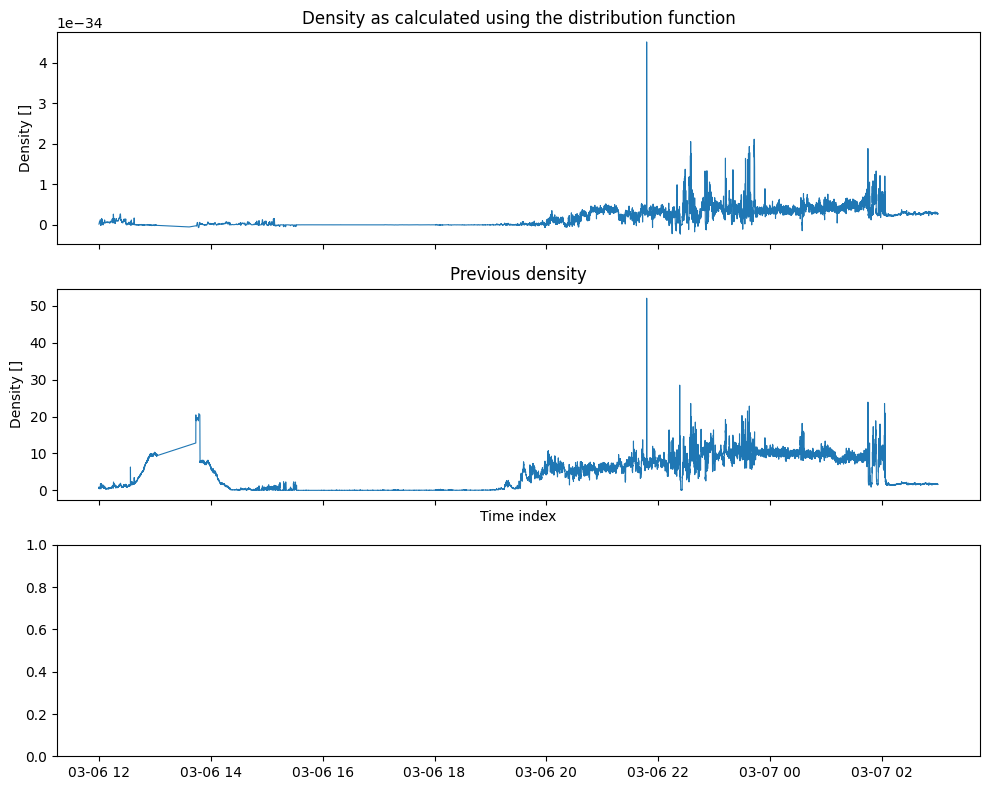

In [28]:
# Visualize

fig, axs = plt.subplots(3, 1, sharex=True, figsize=(10, 8))

axs[0].plot(time,ion_density, lw=0.8)
axs[0].set_ylabel("Density []")
axs[0].set_title("Density as calculated using the distribution function")

axs[1].plot(timeTagsPart, density, lw=0.8)
axs[1].set_ylabel("Density []")
axs[1].set_xlabel("Time index")
axs[1].set_title("Previous density")

plt.tight_layout()
plt.show()